**Week4 Deep Learning Lab Experiment
Build a deep neural network with more than one hidden layer, non-linear functions 
like ReLU.** 

*Objectives:*
- The Layers are desided as
    - one input layer
    - 3 hidden layers
    - 1 ouput layer
- The user can provide the number of neurons for each layer

The following is a sample architecture, but it is not we can change it as per our requirement

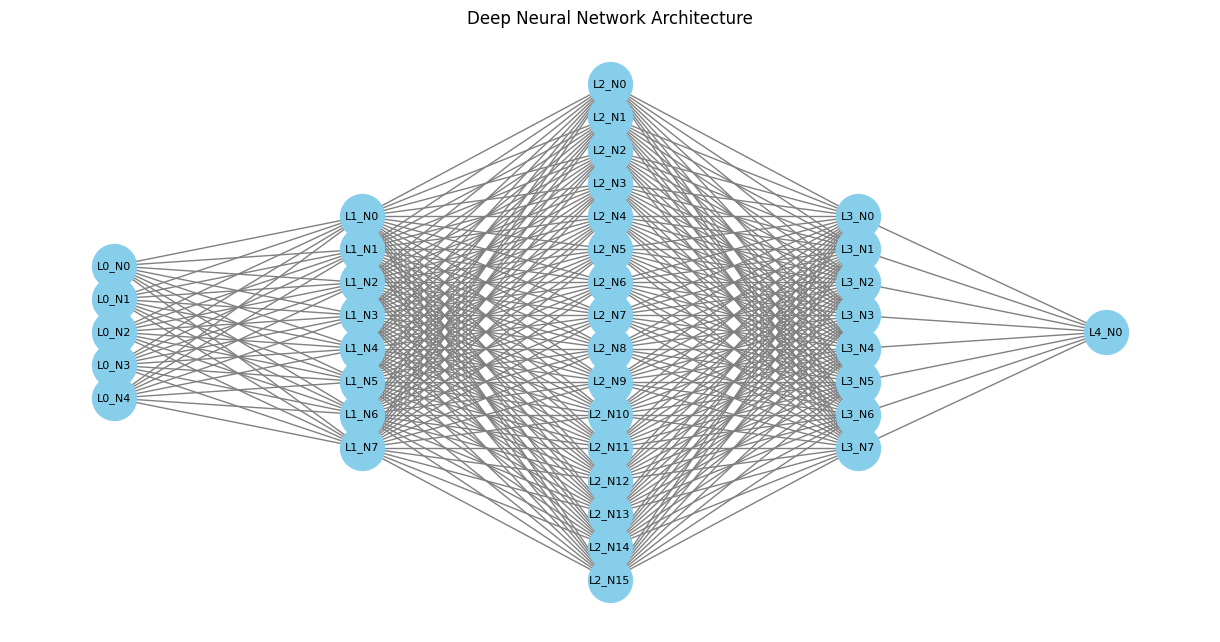

1. Defining the architecture and model parameters.
We are assuming it is as classification model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Deep Neural Network
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepNeuralNetwork, self).__init__()
        
        # Define layers
        self.hidden1 = nn.Linear(input_size, hidden_sizes[0])
        self.hidden2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.hidden3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.output = nn.Linear(hidden_sizes[2], output_size)
        self.output_size = output_size
        
        # Activation
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.3) 

    def forward(self, x):
        x = self.dropout(self.relu(self.hidden1(x)))
        #x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        x= self.softmax(x) # Use Sigmoid for regression; change as needed
        return x

# Parameters
input_size = 30      # Number of input features
hidden_sizes = [16, 8, 8]
output_size = 2      # For regression; use different for classification

# Create the model
model = DeepNeuralNetwork(input_size, hidden_sizes, output_size)



DeepNeuralNetwork(
  (hidden1): Linear(in_features=30, out_features=16, bias=True)
  (hidden2): Linear(in_features=16, out_features=8, bias=True)
  (hidden3): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.3, inplace=False)
)
Predicted Output: tensor([[0.4329, 0.5671],
        [0.4365, 0.5635],
        [0.4288, 0.5712],
        [0.4475, 0.5525],
        [0.4418, 0.5582]], grad_fn=<SoftmaxBackward0>)


2. Reading the breast cancer dataset and segregating it as input and target data set.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# [A] Load and preprocess real data
df = pd.read_csv("./datasets/week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Applying the traing over dataset and saving loss and accuracy for further plots

In [ ]:
# Convert NumPy arrays to torch tensors
x = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train.squeeze(), dtype=torch.long)  # Labels for CrossEntropyLoss

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_values = []
accuracy_values = []
# Training loop
for epoch in range(50):
    optimizer.zero_grad()
    
    output = model(x)                 # shape: [batch_size, num_classes]
    loss = criterion(output, y)      # y must be shape: [batch_size]
    
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    preds = torch.argmax(output, dim=1)
    correct = (preds == y).sum().item()
    accuracy = correct / y.size(0)
    loss_values.append(loss.item())
    accuracy_values.append(accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy*100:.2f}%")


Epoch 0, Loss: 0.7059, Accuracy: 37.36%
Epoch 1, Loss: 0.6944, Accuracy: 37.36%
Epoch 2, Loss: 0.6812, Accuracy: 45.05%
Epoch 3, Loss: 0.6668, Accuracy: 83.30%
Epoch 4, Loss: 0.6478, Accuracy: 92.09%
Epoch 5, Loss: 0.6255, Accuracy: 93.19%
Epoch 6, Loss: 0.6031, Accuracy: 94.07%
Epoch 7, Loss: 0.5781, Accuracy: 93.63%
Epoch 8, Loss: 0.5524, Accuracy: 93.85%
Epoch 9, Loss: 0.5257, Accuracy: 95.16%
Epoch 10, Loss: 0.4984, Accuracy: 94.51%
Epoch 11, Loss: 0.4766, Accuracy: 94.51%
Epoch 12, Loss: 0.4607, Accuracy: 95.16%
Epoch 13, Loss: 0.4334, Accuracy: 95.38%
Epoch 14, Loss: 0.4208, Accuracy: 95.82%
Epoch 15, Loss: 0.4012, Accuracy: 96.92%
Epoch 16, Loss: 0.3908, Accuracy: 96.48%
Epoch 17, Loss: 0.3764, Accuracy: 97.14%
Epoch 18, Loss: 0.3684, Accuracy: 96.92%
Epoch 19, Loss: 0.3590, Accuracy: 97.36%
Epoch 20, Loss: 0.3530, Accuracy: 98.02%
Epoch 21, Loss: 0.3522, Accuracy: 97.58%
Epoch 22, Loss: 0.3448, Accuracy: 98.02%
Epoch 23, Loss: 0.3418, Accuracy: 98.46%
Epoch 24, Loss: 0.3425, Ac

4. Testing our model with test dataset

In [35]:
model.eval()
with torch.no_grad():
    x_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

    test_output = model(x_test)
    test_preds = torch.argmax(test_output, dim=1)
    test_accuracy = (test_preds == y_test).float().mean().item()

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.25%


5. Plotting the training results as loss curve and accuracy curve

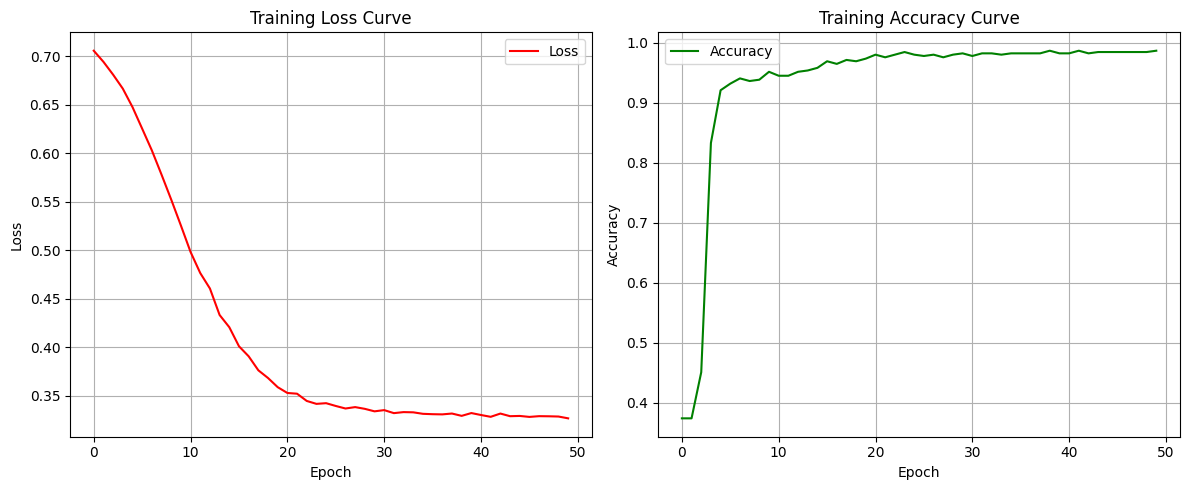

In [36]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Curve")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
